In [3]:
import jax 
from jax import numpy as jnp

##### Demo of MLP

[{'b': DeviceArray([ 1609.0808  ,  2476.8164  ,  -505.20175 ,   308.4849  ,
                41.30705 , -1410.9164  ,   737.08    ,   889.2912  ,
             -2209.2668  ,   205.03976 , -1544.8346  ,    31.953903,
               374.25156 ,  3430.7063  ,  1113.0043  ,  1513.3196  ,
              -403.39746 ,   662.08295 ,   681.9617  ,    81.651115,
               189.04721 ,  -250.79843 ,  2597.259   ,  -688.50793 ],            dtype=float32), 'w': DeviceArray([[-10805.725  ,   2282.6604 ,  -2466.7683 ,   1111.3298 ,
                1059.8312 ,   8855.13   ,   3935.048  ,  -5191.423  ,
                9755.984  ,   1545.8403 ,   2620.7764 ,   1271.9293 ,
                1999.896  , -14347.666  ,  -7417.9814 ,  -9160.465  ,
               -2382.0393 ,   3542.2285 ,   3876.2893 ,   -603.44867,
                -303.91   ,   2116.8623 , -14530.95   ,  -3784.1362 ]],            dtype=float32)}, {'b': DeviceArray([ -89.24021  ,  -77.20003  ,   39.729847 ,  242.48698  ,
              114.212

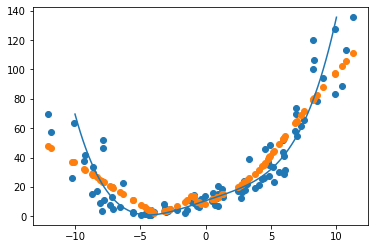

18389.021


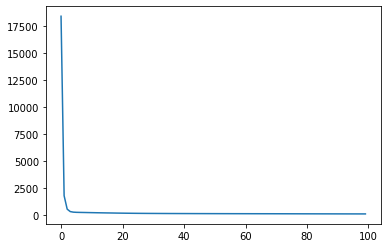

In [4]:
def model_params(layers):
    params = []
    key = jax.random.PRNGKey(512)
    for n_in, n_out in zip(layers[:-1], layers[1:]):
        params.append(dict(w=jax.random.normal(key, (n_in, n_out)), b=jnp.ones(n_out,)))
        key, _ = jax.random.split(key)
    return params

def relu(x):
    return jnp.maximum(x, 0)

def net(params, x):
    *hides, output = params
    for hide in hides:
        x = x @ hide['w'] + hide['b']
        x = relu(x)
    return x @ output['w'] + output['b']

def loss_fn(params, x, y):
    y_hat = net(params, x)
    return jnp.mean((y_hat - y) ** 2)

# @jax.jit
def update(params, x, y, lr=1e-5):
    loss, grads = jax.value_and_grad(loss_fn)(params, x, y)
    print(grads)
    return loss, jax.tree_map(lambda param, grad: param - lr * grad, params, grads)

n_loop = 100
init_params = model_params([1, 24, 128, 1])
x = jnp.linspace(-10, 10, 100)
x = x[:, None]
y = (3 * x) + (.02 * x ** 2) + (.003 * x ** 3) + (.009 * x ** 4) + 10.6
x = x + jax.random.normal(jax.random.PRNGKey(1024), x.shape)

losses = []
for i in range(n_loop):
    loss, init_params = update(init_params, x, y)
    losses.append(loss)

predictions = net(init_params, x)
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], y, label='Ground truth')
plt.scatter(x[:, 0], predictions, label='Prediction')
plt.plot(jnp.linspace(-10, 10, 100), y)
plt.show()
plt.plot(losses)
print(losses[0])